<a href="https://colab.research.google.com/github/cnyakundi/univariate_analysis_with_python/blob/master/Copy_of_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analysis  using python and other tools 

###  Importing our libraries 

In [ ]:
#Pandas 
import pandas as pd 
# Numpy
import numpy as np 
#Seaborn
import seaborn as sns 
#Matplotlib
import matplotlib as plt

import matplotlib

## Defining Exploratory Data Analysis 

In [ ]:
# Exploratory Data Analysis – EDA – plays a critical role in understanding the what, why, and how of the problem statement. 
# It’s first in the order of operations that a data analyst will perform when handed a new data source and problem statement.
# EDA provides a stage for breaking down problem statements into smaller experiments which can help understand the dataset
# EDA provides relevant insights which help analysts make key business decisions
# The EDA step provides a platform to run all thought experiments and ultimately guides us towards making a critical decision

## Our data source 

In [ ]:
#Our data is coming from Kaggle 

url = "https://www.kaggle.com/flenderson/sales-analysis?select=SalesKaggle3.csv" 

## Loading our dataset 

In [ ]:
sales_data=pd.read_csv('SalesKaggle3.csv') 

## Previewing our data 

In [ ]:
sales_data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127.0,0.0,0.0,D,15.0,1.0,682743.0,44.99,2015.0,8.0,28.97,31.84
1,3,Historical,3255963.0,0.0,0.0,D,7.0,1.0,1016014.0,24.81,2005.0,39.0,0.00,15.54
2,4,Historical,612701.0,0.0,0.0,D,0.0,0.0,340464.0,46.00,2013.0,34.0,30.19,27.97
3,6,Historical,115883.0,1.0,1.0,D,4.0,1.0,334011.0,100.00,2006.0,20.0,133.93,83.15
4,7,Historical,863939.0,1.0,1.0,D,2.0,1.0,1287938.0,121.95,2010.0,28.0,4.00,23.99


## Types of variables and descriptive statistics

In [ ]:
# File_Type: The value “Active” means that the particular product needs investigation
# SoldFlag: The value 1 = sale, 0 = no sale in past six months
# SKU_number: This is the unique identifier for each product.
# Order: Just a sequential counter. Can be ignored.
# SoldFlag: 1 = sold in past 6 mos. 0 = Not sold
# MarketingType: Two categories of how we market the product.
# New_Release_Flag: Any product that has had a future release (i.e., Release Number > 1)

## Describing our data

In [ ]:
# The describe function returns a pandas series type that provides descriptive statistics which summarize the central tendency, dispersion,
# and shape of a dataset’s distribution, excluding NaN values. 
# The three main numerical measures for the center of a distribution are the mode, mean(µ), and the median (M). 
# The mode is the most frequently occurring value. The mean is the average value, while the median is the middle value.

In [ ]:
#Describing the data 

sales_data.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,31181.000000,3.118000e+04,31180.000000,31180.000000,31180.000000,31180.000000,3.118000e+04,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000
mean,15973.125269,5.964081e+05,0.257986,0.510969,4.191661,0.734509,1.496914e+06,109.300651,2005.383740,49.081238,71.760757,47.273906
std,9173.704925,7.058254e+05,0.437533,1.509490,3.861869,0.441601,1.806908e+06,84.702717,6.050817,41.287237,101.126950,164.155253
min,2.000000,5.000200e+04,0.000000,0.000000,0.000000,0.000000,2.840000e+02,0.000000,1935.000000,0.000000,0.000000,0.000000
25%,8047.000000,1.420485e+05,0.000000,0.000000,1.000000,0.000000,2.824730e+05,52.950000,2003.000000,23.000000,37.260000,17.250000
50%,15979.000000,4.026855e+05,0.000000,0.000000,3.000000,1.000000,8.840100e+05,89.000000,2007.000000,37.000000,61.790000,33.990000
75%,23910.000000,6.977930e+05,1.000000,1.000000,6.000000,1.000000,2.021823e+06,145.000000,2009.000000,61.000000,96.772500,55.512500
max,31867.000000,3.959831e+06,1.000000,73.000000,99.000000,1.000000,1.666966e+07,2800.000000,2016.000000,851.000000,14140.210000,19138.790000


In [ ]:
# Shape of the data 

print(sales_data.shape)

(31181, 14)


In [ ]:
# Number of unique products 

unique_products= sales_data.nunique()

unique_products

Order               31181
File_Type               2
SKU_number          31180
SoldFlag                2
SoldCount              35
MarketingType           1
ReleaseNumber          46
New_Release_Flag        2
StrengthFactor      30978
PriceReg             5885
ReleaseYear            64
ItemCount             349
LowUserPrice         8414
LowNetPrice          8886
dtype: int64

In [ ]:
# Count of the historical and active state, (we need only analyze the active state products):

print(sales_data[sales_data['File_Type'] == 'Active']['SKU_number'].count())
print(sales_data[sales_data['File_Type'] == 'Historical']['SKU_number'].count())

0
31180


## Univariate and bivariate analysis

Data associated with each attribute includes a long list of values (both numeric and not), and having these values as a long series is not particularly useful yet – they don’t provide any standalone insight. In order to convert the raw data into information we can actually use, we need to summarize and then examine the variable’s distribution.

The univariate distribution plots are graphs where we plot the histograms along with the estimated probability density function over the data. It’s one of the simplest techniques where we consider a single variable and observe its spread and statical properties. The univariate analysis for numerical and categorical attributes are different.

For categorical columns we plot histograms, we use the value_count() and plot.bar() functions to draw a bar plot, which is commonly used for representing categorical data using rectangular bars with value counts of the categorical values. In this case, we have two type of marketing types S and D. The bar plot shows comparisons among these discrete categories, with the x-axis showing the specific categories and the y-axis the measured value.

## Plotting a bar graph 

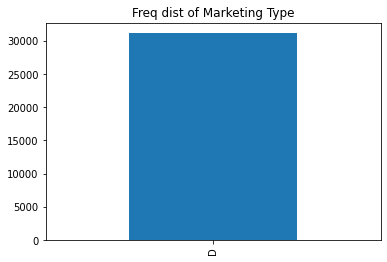

In [ ]:
# Bar Graph 

sales_data_hist=sales_data['MarketingType'].value_counts().plot.bar(title='Freq dist of Marketing Type')

## Missing value analysis

Missing values in the dataset refer to those fields which are empty or no values assigned to them, these usually occur due to data entry errors, faults that occur with data collection processes and often while joining multiple columns from different tables we find a condition which leads to missing values. There are numerous ways with which missing values are treated the easiest ones are to replace the missing value with the mean, median, mode or a constant value (we come to a value based on the domain knowledge) and another alternative is to remove the entry from the dataset itself.

In our dataset we don’t have missing values, thus we are not performing any operations on the dataset that said here are few sample code snippets that will help you perform missing value treatment in python.

In [ ]:
#Checking for null values 

null_values=sales_data.isnull().values.any()

null_values

True

In [ ]:
# Counting number of null values after confirming their existence 
the_null_values_count=sales_data.isnull().sum()

the_null_values_count

Order               0
File_Type           0
SKU_number          1
SoldFlag            1
SoldCount           1
MarketingType       1
ReleaseNumber       1
New_Release_Flag    1
StrengthFactor      1
PriceReg            1
ReleaseYear         1
ItemCount           1
LowUserPrice        1
LowNetPrice         1
dtype: int64

## Outlier detection analysis